# Sign Language recognition

##### Starting with MNIST for sign language

Why MNIST?

The Sign Language MNIST is presented here and follows the same CSV format with labels and pixel values in single rows. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

About Dataset:

The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. The original hand gesture image data represented multiple users repeating the gesture against different backgrounds. The Sign Language MNIST data came from greatly extending the small number (1704) of the color images included as not cropped around the hand region of interest. To create new data, an image pipeline was used based on ImageMagick and included cropping to hands-only, gray-scaling, resizing, and then creating at least 50+ variations to enlarge the quantity. The modification and expansion strategy was filters ('Mitchell', 'Robidoux', 'Catrom', 'Spline', 'Hermite'), along with 5% random pixelation, +/- 15% brightness/contrast, and finally 3 degrees rotation. Because of the tiny size of the images, these modifications effectively alter the resolution and class separation in interesting, controllable ways.

Dataset Citations: https://www.kaggle.com/datasets/datamunge/sign-language-mnist 
Code Citations: 
https://www.kaggle.com/code/himanshubhenwal/sign-language-mnist-using-cnns
https://www.kaggle.com/code/ranjeetjain3/deep-learning-using-sign-langugage

Importing all neccessary libraries here , so that the code looks neat and redable. All necessary libraries are imported at one place to avoid errors later on.

In [1]:
#imports
import numpy as np #linear algebra
import os #accessing directory structure
import matplotlib.pyplot as plt # plotting
import pandas as pd #data loading/pre-processing
import seaborn as sns
from sklearn.model_selection import train_test_split

To see the directory structure when working in the directory for the first time

In [2]:
# for dirname, _, filenames in os.walk(os.getcwd()):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

Understanding the labels and images

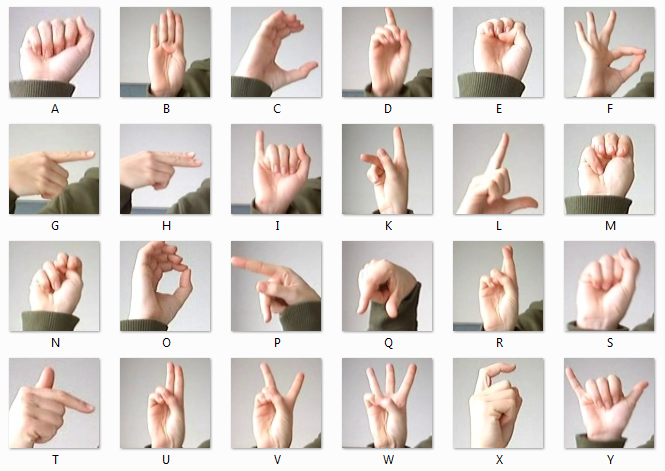

In [3]:
from IPython.display import Image
Image('archive/amer_sign2.png')

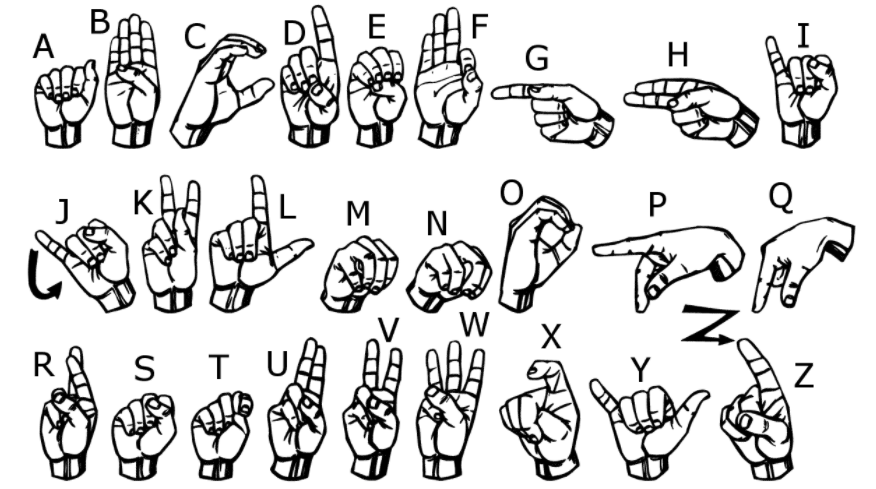

In [4]:
Image("archive/american_sign_language.PNG")

Reading in the csv file for labels and pixel values

In [5]:
train = pd.read_csv('archive\sign_mnist_train.csv')

Printing first 5 values from the dataframe

In [6]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


Seprating the label from the training data.
Creating a seprate train data

In [7]:
Y_train = train['label'].values
x_train = train.drop(['label'], axis = 1)
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


Reading in test data

In [8]:
test = pd.read_csv('archive\sign_mnist_test.csv')

Creating seprate labels and testing data.

In [9]:
y_test = test.iloc[:,0]
x_test = test.drop(['label'], axis = 1)
x_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


Checking number of unique values thus number of classes.

In [10]:
unique_value = np.array(Y_train)
np.unique(unique_value)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

Plotting data distribution on number of classes to check for skewness

<Axes: ylabel='count'>

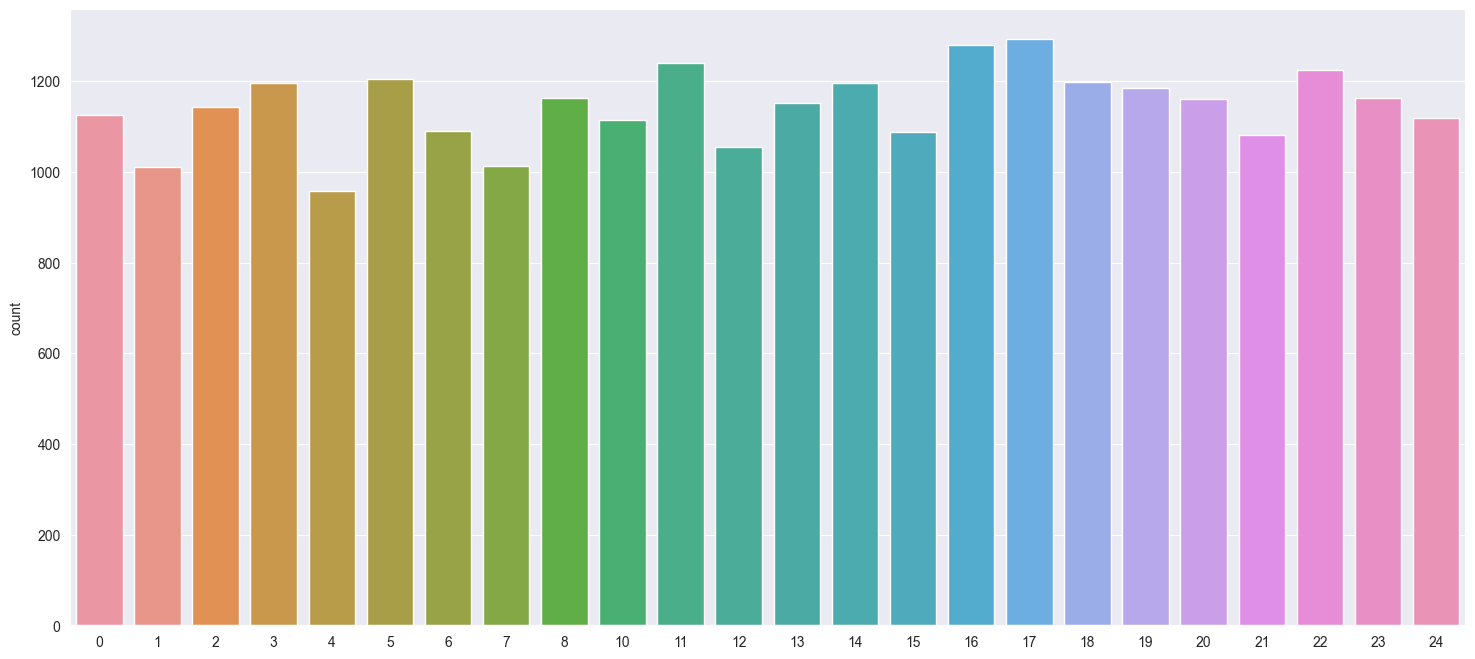

In [11]:
plt.figure(figsize = (18,8))
sns.set_style("darkgrid")
sns.countplot(x = Y_train)

In [12]:
#add stats for the data frame
x_train.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,165.533673,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,31.279244,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,148.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,167.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,186.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


Creating one hot encoding for the labels for the classifiers.

In [13]:
#one-hot encoding
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(Y_train)
test_labels = label_binarizer.fit_transform(y_test)

Grayscale-Normalizing the data or faster convergence

In [14]:
x_train = x_train / 255
x_test = x_test / 255

*Reshaping to create 28*28 image from 784 pixel values

In [15]:
import tensorflow as tf
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

Displaying one sample image after reshaping it in 28*28

C:\Users\skrma\AppData\Local\Temp\ipykernel_20288\2272108094.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


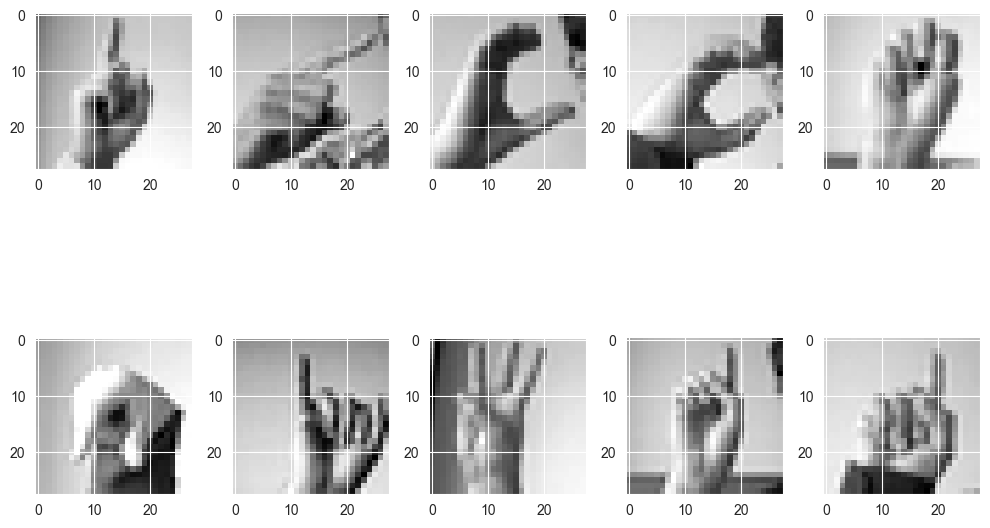

In [16]:


f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()  

Creating test-train split in the test data for validation

In [17]:
 X_train, X_val, y_train, y_val = train_test_split(x_train, labels, test_size = 0.3, random_state = 42)

### 2D CNN for classification

can we flatten the data and use 1D CNNs or Fully Connected network for the same?

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau # for learning rate decay

Defining tunable params

In [19]:
batch_size = 128
num_classes = 24
epochs = 50

Printing statistics for debugging

In [21]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(labels))
print(Y_train[0])
print(labels[0])

(19218, 28, 28, 1)
(19218, 24)
(27455, 24)
3
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Data Augmentation


### CNN model

In [23]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [26]:

model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3),input_shape=(28, 28 ,1) ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size = (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(16, kernel_size = (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.30))

model.add(Dense(num_classes, activation = 'softmax'))

In [27]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

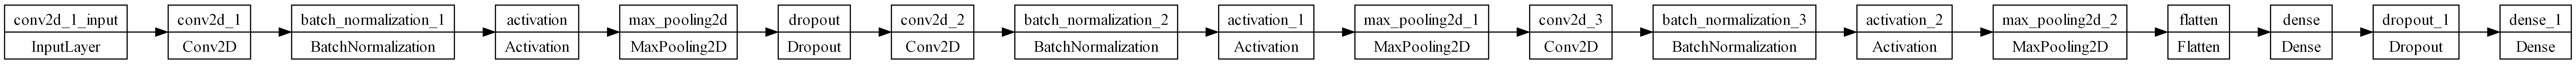

In [28]:
import tensorflow as tf
tf.keras.utils.plot_model(model, 'model.png', show_shapes=False, rankdir='LR', dpi = 300)

In [26]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=epochs, batch_size=batch_size, callbacks = [learning_rate_reduction])

Epoch 1/50
151/151 [==============================] - 9s 11ms/step - loss: 1.9678 - accuracy: 0.4414 - val_loss: 4.0977 - val_accuracy: 0.0413 - lr: 0.0010
Epoch 2/50
151/151 [==============================] - 1s 8ms/step - loss: 0.5908 - accuracy: 0.8377 - val_loss: 4.2552 - val_accuracy: 0.1016 - lr: 0.0010
Epoch 3/50
151/151 [==============================] - 1s 8ms/step - loss: 0.2342 - accuracy: 0.9410 - val_loss: 1.9500 - val_accuracy: 0.3898 - lr: 0.0010
Epoch 4/50
151/151 [==============================] - 1s 8ms/step - loss: 0.1223 - accuracy: 0.9717 - val_loss: 0.6848 - val_accuracy: 0.7744 - lr: 0.0010
Epoch 5/50
151/151 [==============================] - 1s 8ms/step - loss: 0.0748 - accuracy: 0.9826 - val_loss: 0.1537 - val_accuracy: 0.9548 - lr: 0.0010
Epoch 6/50
151/151 [==============================] - 1s 8ms/step - loss: 0.0487 - accuracy: 0.9890 - val_loss: 0.0192 - val_accuracy: 0.9973 - lr: 0.0010
Epoch 7/50
151/151 [==============================] - 1s 9ms/step - l

Epoch 45/50
151/151 [==============================] - 1s 9ms/step - loss: 0.0058 - accuracy: 0.9992 - val_loss: 6.8222e-04 - val_accuracy: 0.9999 - lr: 1.0000e-05
Epoch 46/50
151/151 [==============================] - 1s 9ms/step - loss: 0.0052 - accuracy: 0.9993 - val_loss: 6.2280e-04 - val_accuracy: 0.9999 - lr: 1.0000e-05
Epoch 47/50
151/151 [==============================] - 1s 9ms/step - loss: 0.0050 - accuracy: 0.9994 - val_loss: 6.4611e-04 - val_accuracy: 0.9998 - lr: 1.0000e-05
Epoch 48/50
151/151 [==============================] - 1s 9ms/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 6.4709e-04 - val_accuracy: 0.9998 - lr: 1.0000e-05
Epoch 49/50
151/151 [==============================] - 1s 9ms/step - loss: 0.0063 - accuracy: 0.9988 - val_loss: 5.7233e-04 - val_accuracy: 0.9999 - lr: 1.0000e-05
Epoch 50/50
151/151 [==============================] - 1s 9ms/step - loss: 0.0059 - accuracy: 0.9992 - val_loss: 6.5078e-04 - val_accuracy: 0.9999 - lr: 1.0000e-05


## Model Evaluation

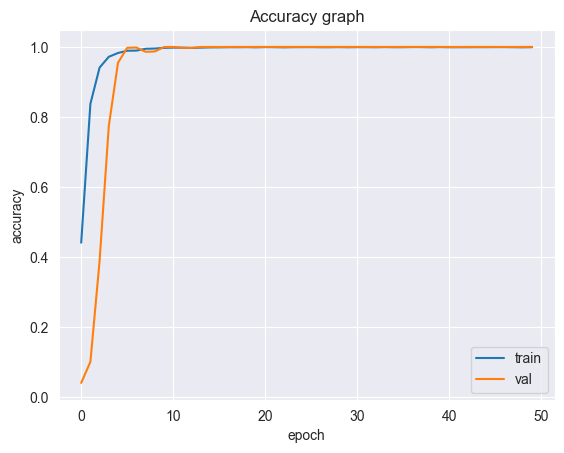

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy graph")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])

plt.show()

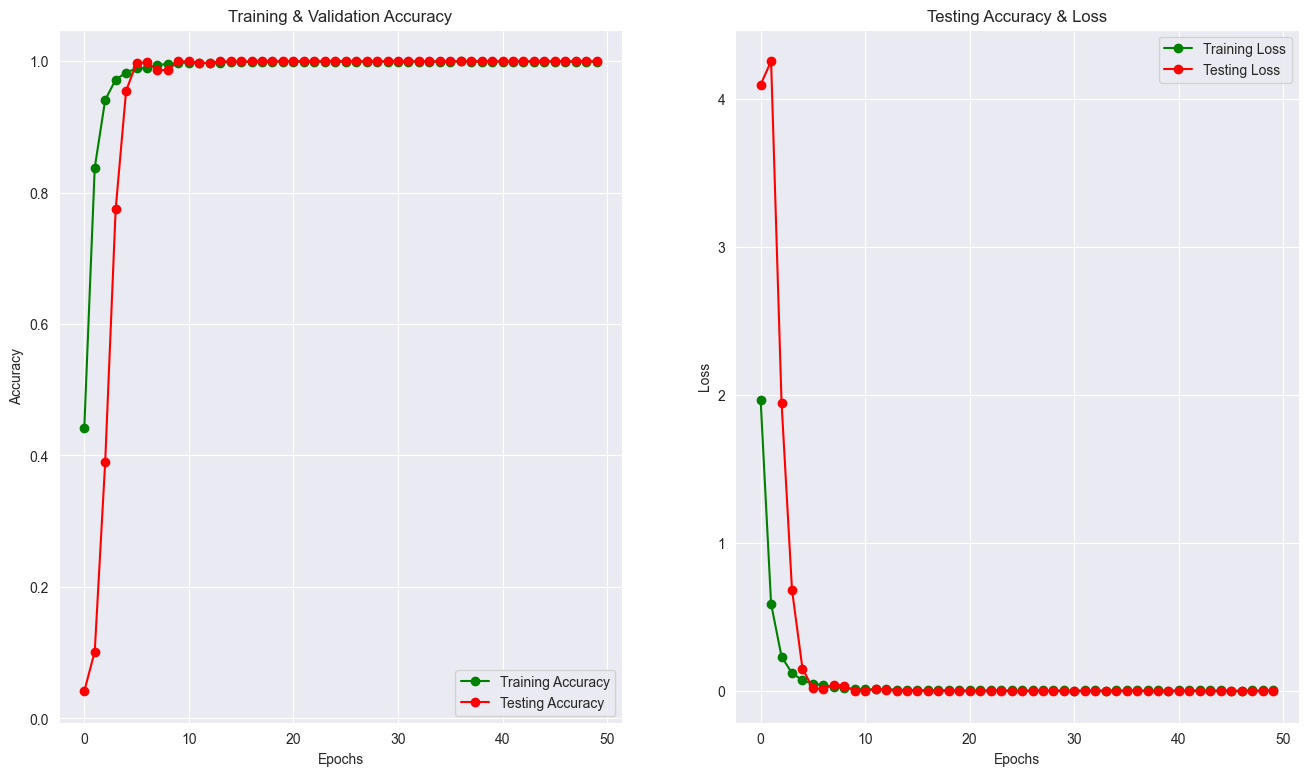

In [28]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [29]:
predictions = model.predict(x_test).round()
predictions = predictions.astype(int)
classes=np.argmax(predictions,axis=1)
for i in range(len(classes)):
    if(classes[i] >= 9):
        classes[i] += 1
classes[:6]


225/225 [==============================] - 1s 2ms/step


array([ 6,  5, 10,  0,  3, 21], dtype=int64)

In [30]:
class_names = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(test_labels, predictions, target_names = class_names))

              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00       331
     Class 1       1.00      1.00      1.00       432
     Class 2       0.99      0.96      0.98       310
     Class 3       0.82      0.84      0.83       245
     Class 4       0.96      0.99      0.98       498
     Class 5       0.99      1.00      1.00       247
     Class 6       0.90      0.97      0.94       348
     Class 7       0.95      0.95      0.95       436
     Class 8       0.94      0.81      0.87       288
    Class 10       1.00      0.81      0.89       331
    Class 11       1.00      1.00      1.00       209
    Class 12       1.00      0.85      0.92       394
    Class 13       0.91      0.91      0.91       291
    Class 14       0.95      0.94      0.95       246
    Class 15       0.95      0.98      0.97       347
    Class 16       0.94      1.00      0.97       164
    Class 17       0.80      0.78      0.79       144
    Class 18       0.89    

C:\Users\skrma\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


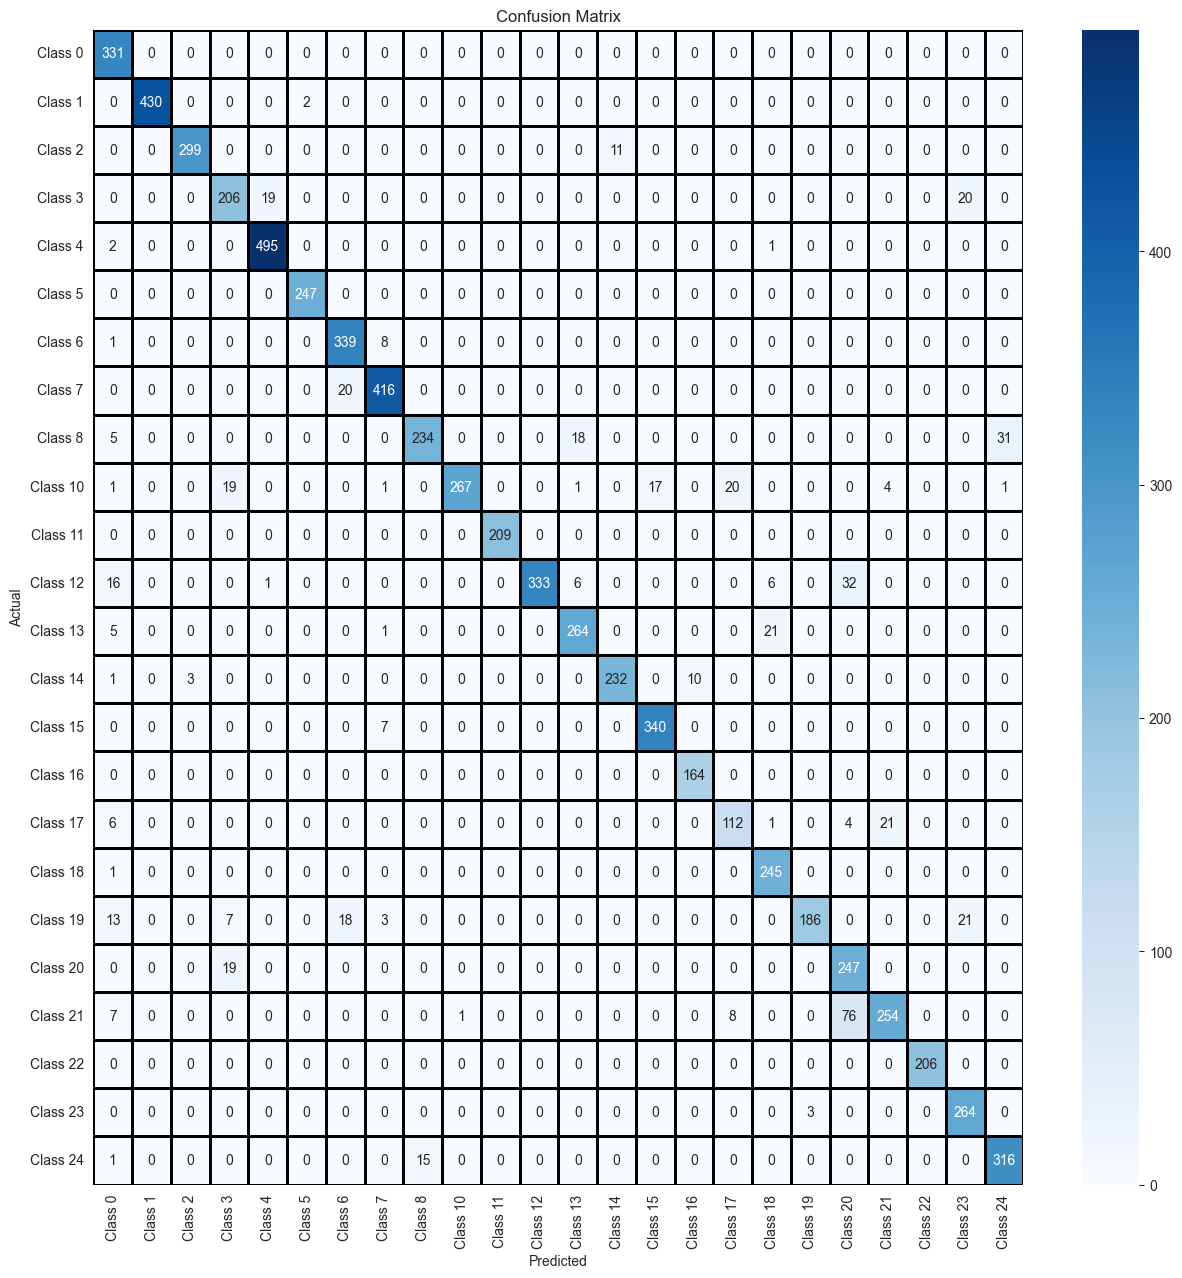

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,classes)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Set up the heatmap plot
plt.figure(figsize=(15, 15))
sns.heatmap(cm_df, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='d')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
p = np.argmax(predictions,axis=1)
t = np.argmax(test_labels,axis=1)

correct = np.where(p == t)[0]


**Some of the Correctly Predicted Classes**

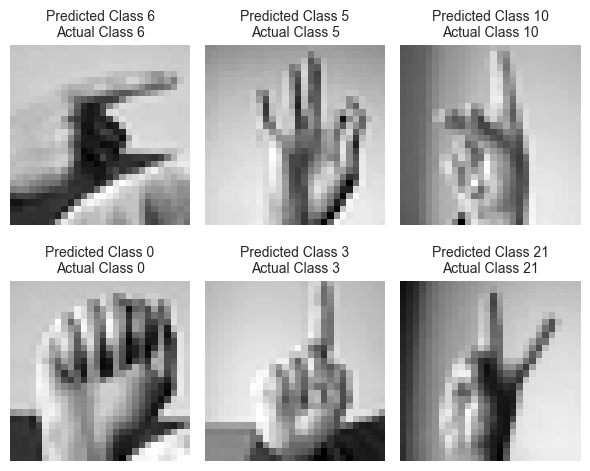

In [37]:
num_images = 6  # Number of correctly predicted images to display
plt.figure(figsize=(6, 5))  # Adjust figure size

for i, c in enumerate(correct[:num_images]):
    plt.subplot(2, 3, i + 1)  # Display 2 rows and 3 columns of subplots
    plt.imshow(x_test[c].reshape(28, 28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {}\nActual Class {}".format(classes[c], y_test[c]), fontsize=10)
    plt.axis('off')  # Turn off axis
    plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Adjust spacing between subplots

plt.tight_layout()  # Adjust overall layout
plt.show()

In [38]:
test_labels = y_test
test_images = x_test
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_labels = label_binarizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [39]:

y_pred = model.predict(x_test)

225/225 [==============================] - 1s 2ms/step


In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())

0.9252649191299498

In [41]:

from sklearn import metrics

y_pred = np.array(y_pred)

y_pred = np.where(y_pred>0.5,1,0) 

f1s = metrics.f1_score(test_labels, y_pred, average = 'weighted')
print('F1 score is = ', f1s)

F1 score is =  0.9285028048737118


Actual Label 6
Predicted Label 6


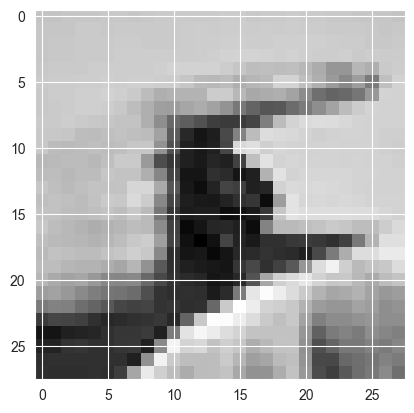

In [42]:
#Selecting a random sample from the test set
plt.imshow(x_test[0].reshape(28,28), cmap = 'gray')
print('Actual Label',y_test[0] )
print('Predicted Label', classes[0])